# DQN

In this notebook, we'll build a neural network that can learn to play games through reinforcement learning. 

In [1]:
# In this one we should define and detect GPUs for tensorflow
# GPUs or CPU
import tensorflow as tf

# Check TensorFlow Version
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.7.1
Default GPU Device: /device:GPU:0


>**Note:** Make sure you have OpenAI Gym cloned into the same directory with this notebook. I've included `gym` as a submodule, so you can run `git submodule --init --recursive` to pull the contents into the `gym` repo.

>**Note:** Make sure you have OpenAI Gym cloned. Then run this command `pip install -e gym/[all]`.

In [2]:
import gym
env = gym.make('Acrobot-v1')

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


We interact with the simulation through `env`. To show the simulation running, you can use `env.render()` to render one frame. Passing in an action as an integer to `env.step` will generate the next step in the simulation.  You can see how many actions are possible from `env.action_space` and to get a random action you can use `env.action_space.sample()`. This is general to all Gym games. In the Cart-Pole game, there are two possible actions, moving the cart left or right. So there are two actions we can take, encoded as 0 and 1.

Run the code below to watch the simulation run.

In [3]:
import numpy as np

state = env.reset()
batch = []
for _ in range(1000):
    # env.render()
    action = env.action_space.sample()
    next_state, reward, done, info = env.step(action) # take a random action
    batch.append([state, action, next_state, reward, float(done)])
    print('state, action, reward, done, info:', 
          state, action, reward, done, info)
    state = next_state
    if done:
        state = env.reset()

state, action, reward, done, info: [ 0.99989252 -0.01466129  0.99616522  0.08749202 -0.00902808 -0.06894136] 0 -1.0 False {}
state, action, reward, done, info: [ 9.99999987e-01  1.61953504e-04  9.99561439e-01  2.96129879e-02
  1.52293064e-01 -4.98332031e-01] 1 -1.0 False {}
state, action, reward, done, info: [ 0.99957239  0.02924106  0.99764688 -0.0685617   0.12956216 -0.46254085] 0 -1.0 False {}
state, action, reward, done, info: [ 0.99808812  0.06180695  0.98358908 -0.18042316  0.18600244 -0.64044194] 1 -1.0 False {}
state, action, reward, done, info: [ 0.99631932  0.08571942  0.96117504 -0.27593937  0.04658256 -0.32199838] 1 -1.0 False {}
state, action, reward, done, info: [ 0.99687593  0.07898347  0.95369567 -0.30077327 -0.11309361  0.06513157] 2 -1.0 False {}
state, action, reward, done, info: [ 0.9995646   0.02950627  0.97549525 -0.22002049 -0.3703753   0.75103438] 0 -1.0 False {}
state, action, reward, done, info: [ 0.99938404 -0.03509343  0.99616581 -0.08748525 -0.25839445  0.5

state, action, reward, done, info: [ 0.9928094  -0.11970588  0.94500921 -0.32704372  2.18565294 -3.36771997] 2 -1.0 False {}
state, action, reward, done, info: [ 0.95881029  0.28404721  0.62534763 -0.7803463   1.81220076 -2.12268882] 1 -1.0 False {}
state, action, reward, done, info: [ 0.83054538  0.55695097  0.37655691 -0.92639349  1.16452121 -0.74098282] 1 -1.0 False {}
state, action, reward, done, info: [ 0.74002845  0.67257556  0.37394921 -0.92744918  0.2778211   0.71262989] 1 -1.0 False {}
state, action, reward, done, info: [ 0.76781498  0.64067164  0.62096428 -0.78383886 -0.70188038  2.14554234] 0 -1.0 False {}
state, action, reward, done, info: [ 0.88860217  0.45867874  0.93120479 -0.36449643 -1.43755135  3.04658267] 0 -1.0 False {}
state, action, reward, done, info: [ 0.98843318  0.151657    0.96701013  0.25473791 -1.70965728  3.07228514] 0 -1.0 False {}
state, action, reward, done, info: [ 0.98559732 -0.16910919  0.70871315  0.70549675 -1.44248519  2.06283991] 1 -1.0 False {}


state, action, reward, done, info: [ 0.67517081  0.73766143 -0.63328999 -0.77391459  0.85366362 -0.05743997] 1 -1.0 False {}
state, action, reward, done, info: [ 0.61806497  0.78612702 -0.51956053 -0.85443365 -0.12603283  1.46186018] 1 -1.0 False {}
state, action, reward, done, info: [ 0.71490139  0.69922528 -0.09359147 -0.99561069 -1.18029431  3.09500244] 2 -1.0 False {}
state, action, reward, done, info: [ 0.91189659  0.41042004  0.67128035 -0.74120355 -2.32020219  5.22802334] 0 -1.0 False {}
state, action, reward, done, info: [ 0.99611144 -0.08810219  0.95730897  0.28906666 -2.58112131  5.6243042 ] 2 -1.0 False {}
state, action, reward, done, info: [ 0.85242076 -0.52285644  0.26071479  0.96541587 -1.92827394  4.31673174] 0 -1.0 False {}
state, action, reward, done, info: [ 0.67652751 -0.73641736 -0.38413772  0.9232758  -0.84863666  2.32127643] 2 -1.0 False {}
state, action, reward, done, info: [ 0.61823645 -0.78599217 -0.66231829  0.74922258  0.08285268  0.99131117] 0 -1.0 False {}


state, action, reward, done, info: [ 0.79682627 -0.60420849  0.99895816 -0.04563539 -2.15743328  4.37461155] 1 -1.0 False {}
state, action, reward, done, info: [ 0.55424469 -0.83235379  0.74465954  0.66744451 -1.10262537  3.22686894] 1 -1.0 False {}
state, action, reward, done, info: [ 0.47688554 -0.8789654   0.34293753  0.93935821  0.20776356  1.6551403 ] 1 -1.0 False {}
state, action, reward, done, info: [ 0.61809758 -0.78610138  0.18357418  0.98300586  1.45530017 -0.02370679] 1 -1.0 False {}
state, action, reward, done, info: [ 0.87219132 -0.48916491  0.3601037   0.93291228  2.41139113 -1.81635913] 1 -1.0 False {}
state, action, reward, done, info: [ 0.99964632  0.02659394  0.78079531  0.62478691  2.86740748 -3.34641169] 2 -1.0 False {}
state, action, reward, done, info: [ 0.84019528  0.54228396  0.99987562 -0.01577176  2.4632076  -3.28910658] 2 -1.0 False {}
state, action, reward, done, info: [ 0.56915872  0.82222768  0.85286786 -0.52212681  1.39009497 -1.93529105] 1 -1.0 False {}


state, action, reward, done, info: [ 0.99716871  0.07519677  0.96666139  0.25605811  0.62449383 -1.16153149] 1 -1.0 False {}
state, action, reward, done, info: [ 0.98211026  0.18830677  0.99983144  0.01835989  0.48664107 -1.18455288] 2 -1.0 False {}
state, action, reward, done, info: [ 0.97002752  0.2429951   0.98762261 -0.15684891  0.05745984 -0.53683618] 0 -1.0 False {}
state, action, reward, done, info: [ 0.97218171  0.23422791  0.96728908 -0.25367664 -0.1491619  -0.43727548] 1 -1.0 False {}
state, action, reward, done, info: [ 0.98490467  0.17309763  0.9570454  -0.28993811 -0.46344838  0.05729794] 1 -1.0 False {}
state, action, reward, done, info: [ 0.99827709  0.05867587  0.97144358 -0.23727067 -0.66410411  0.46243097] 2 -1.0 False {}
state, action, reward, done, info: [ 0.99569868 -0.09265066  0.99598499 -0.0895204  -0.81556743  0.9873861 ] 2 -1.0 False {}
state, action, reward, done, info: [ 0.96851229 -0.24896574  0.99145051  0.1304833  -0.73376792  1.15374168] 0 -1.0 False {}


state, action, reward, done, info: [ 0.76193899  0.64764881  0.85278231 -0.52226654  0.86137464 -2.4317617 ] 0 -1.0 False {}
state, action, reward, done, info: [ 0.70479502  0.70941101  0.59037258 -0.80713086 -0.03847653 -1.42242806] 0 -1.0 False {}
state, action, reward, done, info: [ 0.77193912  0.63569646  0.44632133 -0.89487277 -0.94167004 -0.25209081] 2 -1.0 False {}
state, action, reward, done, info: [ 0.91900621  0.39424306  0.55590719 -0.83124436 -1.84207733  1.50673921] 2 -1.0 False {}
state, action, reward, done, info: [ 0.99977072 -0.02141291  0.8665479  -0.49909391 -2.34347267  2.98152167] 0 -1.0 False {}
state, action, reward, done, info: [ 0.89435554 -0.44735687  0.99745495  0.07129949 -1.96813221  2.74450571] 2 -1.0 False {}
state, action, reward, done, info: [ 0.69949381 -0.71463866  0.84105754  0.54094566 -1.28543807  2.14099528] 0 -1.0 False {}
state, action, reward, done, info: [ 0.59261949 -0.80548255  0.66696283  0.74509099 -0.10440562  0.54033995] 0 -1.0 False {}


state, action, reward, done, info: [ 0.83298613  0.55329387 -0.05486805 -0.99849361  1.74045516 -2.68279691] 1 -1.0 False {}
state, action, reward, done, info: [ 0.65788628  0.75311729 -0.41696203 -0.9089239   0.89547937 -1.08712538] 0 -1.0 False {}
state, action, reward, done, info: [ 0.5874746   0.8092426  -0.49379173 -0.8695802  -0.00704443  0.21945108] 0 -1.0 False {}
state, action, reward, done, info: [ 0.66047685  0.75084641 -0.33509575 -0.94218408 -0.91858081  1.53511517] 1 -1.0 False {}
state, action, reward, done, info: [ 0.83942421  0.54347677  0.12684836 -0.99192212 -1.80730494  3.177685  ] 0 -1.0 False {}
state, action, reward, done, info: [ 0.98885506  0.14888139  0.78544023 -0.61893752 -2.38018365  4.50036435] 2 -1.0 False {}
state, action, reward, done, info: [ 0.93801306 -0.34659992  0.94658553  0.32245284 -2.47820065  5.089886  ] 0 -1.0 False {}
state, action, reward, done, info: [ 0.73123284 -0.68212795  0.3902772   0.9206974  -1.42139066  3.22079782] 0 -1.0 False {}


To shut the window showing the simulation, use `env.close()`.

If you ran the simulation above, we can look at the rewards:

In [4]:
batch[0], batch[0][0].shape

([array([ 0.99989252, -0.01466129,  0.99616522,  0.08749202, -0.00902808,
         -0.06894136]),
  0,
  array([ 9.99999987e-01,  1.61953504e-04,  9.99561439e-01,  2.96129879e-02,
          1.52293064e-01, -4.98332031e-01]),
  -1.0,
  0.0],
 (6,))

In [5]:
states = np.array([each[0] for each in batch])
actions = np.array([each[1] for each in batch])
next_states = np.array([each[2] for each in batch])
rewards = np.array([each[3] for each in batch])
dones = np.array([each[4] for each in batch])

In [6]:
print(rewards[-20:])
print(np.array(rewards).shape, np.array(states).shape, np.array(actions).shape, np.array(dones).shape)
print(np.array(rewards).dtype, np.array(states).dtype, np.array(actions).dtype, np.array(dones).dtype)
print(np.max(np.array(actions)), np.min(np.array(actions)))
print((np.max(np.array(actions)) - np.min(np.array(actions)))+1)
print(np.max(np.array(rewards)), np.min(np.array(rewards)))
print(np.max(np.array(states)), np.min(np.array(states)))

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.]
(1000,) (1000, 6) (1000,) (1000,)
float64 float64 int64 float64
2 0
3
-1.0 -1.0
6.002648100120611 -5.941679155217321


The game resets after the pole has fallen past a certain angle. For each frame while the simulation is running, it returns a reward of 1.0. The longer the game runs, the more reward we get. Then, our network's goal is to maximize the reward by keeping the pole vertical. It will do this by moving the cart to the left and the right.

## Q-Network

We train our Q-learning agent using the Bellman Equation:

$$
Q(s, a) = r + \gamma \max{Q(s', a')}
$$

where $s$ is a state, $a$ is an action, and $s'$ is the next state from state $s$ and action $a$.

Before we used this equation to learn values for a Q-_table_. However, for this game there are a huge number of states available. The state has four values: the position and velocity of the cart, and the position and velocity of the pole. These are all real-valued numbers, so ignoring floating point precisions, you practically have infinite states. Instead of using a table then, we'll replace it with a neural network that will approximate the Q-table lookup function.

<img src="assets/deep-q-learning.png" width=450px>

Now, our Q value, $Q(s, a)$ is calculated by passing in a state to the network. The output will be Q-values for each available action, with fully connected hidden layers.

<img src="assets/q-network.png" width=550px>


As I showed before, we can define our targets for training as $\hat{Q}(s,a) = r + \gamma \max{Q(s', a')}$. Then we update the weights by minimizing $(\hat{Q}(s,a) - Q(s,a))^2$. 

For this Cart-Pole game, we have four inputs, one for each value in the state, and two outputs, one for each action. To get $\hat{Q}$, we'll first choose an action, then simulate the game using that action. This will get us the next state, $s'$, and the reward. With that, we can calculate $\hat{Q}$ then pass it back into the $Q$ network to run the optimizer and update the weights.

Below is my implementation of the Q-network. I used two fully connected layers with ReLU activations. Two seems to be good enough, three might be better. Feel free to try it out.

In [7]:
def model_input(state_size):
    states = tf.placeholder(tf.float32, [None, state_size], name='states')
    actions = tf.placeholder(tf.int32, [None], name='actions')
    targetQs = tf.placeholder(tf.float32, [None], name='targetQs')
    return states, actions, targetQs

In [8]:
# Generator: Generating/prediting the actions
def generator(states, action_size, hidden_size, reuse=False, alpha=0.1, training=False):
    with tf.variable_scope('generator', reuse=reuse):
        # First fully connected layer
        h1 = tf.layers.dense(inputs=states, units=hidden_size)
        bn1 = tf.layers.batch_normalization(h1, training=training)        
        nl1 = tf.maximum(alpha * bn1, bn1)
        
        # Second fully connected layer
        h2 = tf.layers.dense(inputs=nl1, units=hidden_size)
        bn2 = tf.layers.batch_normalization(h2, training=training)        
        nl2 = tf.maximum(alpha * bn2, bn2)
        
        # Output layer
        logits = tf.layers.dense(inputs=nl2, units=action_size)        
        #predictions = tf.nn.softmax(logits)

        # return actions logits
        return logits

In [9]:
def model_loss(states, actions, targetQs, action_size, hidden_size):
    actions_logits = generator(states=states, hidden_size=hidden_size, action_size=action_size)
    actions_labels = tf.one_hot(indices=actions, depth=action_size, dtype=actions_logits.dtype)
    Qs = tf.reduce_max(actions_logits*actions_labels, axis=1)
    #Qs = tf.reduce_max(actions_logits, axis=1)
    loss = tf.reduce_mean(tf.square(Qs - targetQs))
    return actions_logits, loss

In [10]:
def model_opt(loss, learning_rate):
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)): # Required for batchnorm (BN)
        opt = tf.train.AdamOptimizer(learning_rate).minimize(loss, var_list=g_vars)

    return opt

In [11]:
class Model:
    def __init__(self, state_size, action_size, hidden_size, learning_rate):

        # Data of the Model: make the data available inside the framework
        self.states, self.actions, self.targetQs = model_input(state_size=state_size)

        # Create the Model: calculating the loss and forwad pass
        self.actions_logits, self.loss = model_loss(
            action_size=action_size, hidden_size=hidden_size, # model init parameters
            states=self.states, actions=self.actions, targetQs=self.targetQs) # model input

        # Update the model: backward pass and backprop
        self.opt = model_opt(loss=self.loss, learning_rate=learning_rate)

## Experience replay

Reinforcement learning algorithms can have stability issues due to correlations between states. To reduce correlations when training, we can store the agent's experiences and later draw a random mini-batch of those experiences to train on. 

Here, we'll create a `Memory` object that will store our experiences, our transitions $<s, a, r, s'>$. This memory will have a maxmium capacity, so we can keep newer experiences in memory while getting rid of older experiences. Then, we'll sample a random mini-batch of transitions $<s, a, r, s'>$ and train on those.

Below, I've implemented a `Memory` object. If you're unfamiliar with `deque`, this is a double-ended queue. You can think of it like a tube open on both sides. You can put objects in either side of the tube. But if it's full, adding anything more will push an object out the other side. This is a great data structure to use for the memory buffer.

In [12]:
from collections import deque
class Memory():
    def __init__(self, max_size = 1000):
        self.buffer = deque(maxlen=max_size)
    def sample(self, batch_size):
        idx = np.random.choice(np.arange(len(self.buffer)), 
                               size=batch_size, 
                               replace=False)
        return [self.buffer[ii] for ii in idx]

## Exploration - Exploitation

To learn about the environment and rules of the game, the agent needs to explore by taking random actions. We'll do this by choosing a random action with some probability $\epsilon$ (epsilon).  That is, with some probability $\epsilon$ the agent will make a random action and with probability $1 - \epsilon$, the agent will choose an action from $Q(s,a)$. This is called an **$\epsilon$-greedy policy**.


At first, the agent needs to do a lot of exploring. Later when it has learned more, the agent can favor choosing actions based on what it has learned. This is called _exploitation_. We'll set it up so the agent is more likely to explore early in training, then more likely to exploit later in training.

## Q-Learning training algorithm

Putting all this together, we can list out the algorithm we'll use to train the network. We'll train the network in _episodes_. One *episode* is one simulation of the game. For this game, the goal is to keep the pole upright for 195 frames. So we can start a new episode once meeting that goal. The game ends if the pole tilts over too far, or if the cart moves too far the left or right. When a game ends, we'll start a new episode. Now, to train the agent:

* Initialize the memory $D$
* Initialize the action-value network $Q$ with random weights
* **For** episode = 1, $M$ **do**
  * **For** $t$, $T$ **do**
     * With probability $\epsilon$ select a random action $a_t$, otherwise select $a_t = \mathrm{argmax}_a Q(s,a)$
     * Execute action $a_t$ in simulator and observe reward $r_{t+1}$ and new state $s_{t+1}$
     * Store transition $<s_t, a_t, r_{t+1}, s_{t+1}>$ in memory $D$
     * Sample random mini-batch from $D$: $<s_j, a_j, r_j, s'_j>$
     * Set $\hat{Q}_j = r_j$ if the episode ends at $j+1$, otherwise set $\hat{Q}_j = r_j + \gamma \max_{a'}{Q(s'_j, a')}$
     * Make a gradient descent step with loss $(\hat{Q}_j - Q(s_j, a_j))^2$
  * **endfor**
* **endfor**

## Hyperparameters

One of the more difficult aspects of reinforcememt learning are the large number of hyperparameters. Not only are we tuning the network, but we're tuning the simulation.

In [13]:
print('state size:{}'.format(states.shape), 
      'actions:{}'.format(actions.shape)) 
print('action size:', np.max(actions) - np.min(actions)+1)

state size:(1000, 6) actions:(1000,)
action size: 3


In [21]:
env.action_space, env.observation_space

(Discrete(3), Box(6,))

In [22]:
env.action_space.dtype, env.observation_space.dtype

(dtype('int64'), dtype('float32'))

In [27]:
env.action_space.contains, env.observation_space.contains

(<bound method Discrete.contains of Discrete(3)>,
 <bound method Box.contains of Box(6,)>)

In [29]:
env.action_space.from_jsonable, env.observation_space.from_jsonable

(<bound method Space.from_jsonable of Discrete(3)>,
 <bound method Box.from_jsonable of Box(6,)>)

In [30]:
env.action_space.n, env.observation_space.high

(3, array([ 1.      ,  1.      ,  1.      ,  1.      , 12.566371, 28.274334],
       dtype=float32))

In [31]:
env.action_space.n, env.observation_space.low

(3, array([ -1.      ,  -1.      ,  -1.      ,  -1.      , -12.566371,
        -28.274334], dtype=float32))

In [32]:
env.action_space.sample, env.observation_space.sample

(<bound method Discrete.sample of Discrete(3)>,
 <bound method Box.sample of Box(6,)>)

In [33]:
env.action_space.shape, env.observation_space.shape

((), (6,))

In [34]:
env.action_space.n, env.observation_space.shape[0]

(3, 6)

In [41]:
# Exploration parameters
explore_start = 1.0            # exploration probability at start
explore_stop = 0.01            # minimum exploration probability 
decay_rate = 0.0001            # exponential decay rate for exploration prob

# Network parameters
action_size = 3                # action size/shape
state_size = 6                 # state/observation size/shape
hidden_size = 6*2              # number of units in each Q-network hidden layer
learning_rate = 0.0001         # Q-network learning rate

# Memory parameters
memory_size = 10000            # memory capacity
batch_size = 100               # experience mini-batch size
gamma = 0.99                   # future reward discount

In [42]:
# Reset/init the graph/session
graph = tf.reset_default_graph()

# Init the model
model = Model(action_size=action_size, hidden_size=hidden_size, state_size=state_size, learning_rate=learning_rate)

# Init the memory
memory = Memory(max_size=memory_size)

## Populate the memory (exprience memory)

Here I'm re-initializing the simulation and pre-populating the memory. The agent is taking random actions and storing the transitions in memory. This will help the agent with exploring the game.

In [43]:
state = env.reset()
for _ in range(memory_size):
    action = env.action_space.sample()
    next_state, reward, done, _ = env.step(action)
    memory.buffer.append([state, action, next_state, reward, float(done)])
    state = next_state
    if done is True:
        state = env.reset()

## Training the model

Below we'll train our agent. If you want to watch it train, uncomment the `env.render()` line. This is slow because it's rendering the frames slower than the network can train. But, it's cool to watch the agent get better at the game.

In [44]:
# Save/load the model and save for plotting
saver = tf.train.Saver()
episode_rewards_list, rewards_list, loss_list = [], [], []

# TF session for training
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess, 'checkpoints/model.ckpt')    
    #saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    total_step = 0 # Explore or exploit parameter
    episode_reward = deque(maxlen=100) # 100 episodes average/running average/running mean/window
    
    # Training episodes/epochs
    for ep in range(1111):
        total_reward = 0
        loss_batch = []
        state = env.reset()

        # Training steps/batches
        while True:
            # Explore (Env) or Exploit (Model): NO
            total_step += 1
            explore_p = explore_stop + (explore_start - explore_stop) * np.exp(-decay_rate * total_step) 
            # if explore_p > np.random.rand():
            #     action = env.action_space.sample()
            # else:
            action_logits = sess.run(model.actions_logits, feed_dict={model.states: state.reshape([1, -1])})
            action = np.argmax(action_logits)
            next_state, reward, done, _ = env.step(action)
            memory.buffer.append([state, action, next_state, reward, float(done)])
            total_reward += reward
            state = next_state

            # Training
            batch = memory.sample(batch_size)
            states = np.array([each[0] for each in batch])
            actions = np.array([each[1] for each in batch])
            next_states = np.array([each[2] for each in batch])
            rewards = np.array([each[3] for each in batch])
            dones = np.array([each[4] for each in batch])
            next_actions_logits = sess.run(model.actions_logits, feed_dict = {model.states: next_states})
            nextQs = np.max(next_actions_logits, axis=1) * (1-dones)
            targetQs = rewards + (gamma * nextQs)
            loss, _ = sess.run([model.loss, model.opt], feed_dict = {model.states: states, 
                                                                     model.actions: actions,
                                                                     model.targetQs: targetQs})
            loss_batch.append(loss)
            if done is True:
                break
                
        episode_reward.append(total_reward)
        print('Episode:{}'.format(ep),
              'meanR:{:.4f}'.format(np.mean(episode_reward)),
              'R:{}'.format(total_reward),
              'loss:{:.4f}'.format(np.mean(loss_batch)),
              'exploreP:{:.4f}'.format(explore_p))
        # Ploting out
        episode_rewards_list.append([ep, np.mean(episode_reward)])
        rewards_list.append([ep, total_reward])
        loss_list.append([ep, np.mean(loss_batch)])
#         # Break episode/epoch loop
#         if np.mean(episode_reward) >= 500:
#             break
            
    # At the end of all training episodes/epochs
    saver.save(sess, 'checkpoints/model.ckpt')

InternalError: Blas GEMM launch failed : a.shape=(1, 6), b.shape=(6, 12), m=1, n=12, k=6
	 [[Node: generator/dense/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_states_0_0/_1, generator/dense/kernel/read)]]

Caused by op 'generator/dense/MatMul', defined at:
  File "/home/arasdar/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/arasdar/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/arasdar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/arasdar/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/arasdar/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 497, in start
    self.io_loop.start()
  File "/home/arasdar/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/home/arasdar/anaconda3/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/home/arasdar/anaconda3/lib/python3.6/asyncio/base_events.py", line 1434, in _run_once
    handle._run()
  File "/home/arasdar/anaconda3/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/arasdar/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "/home/arasdar/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/arasdar/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/arasdar/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/arasdar/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/arasdar/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/arasdar/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/arasdar/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/arasdar/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/arasdar/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/arasdar/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/arasdar/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/arasdar/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/arasdar/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2901, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/arasdar/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-42-0284fdf34c52>", line 5, in <module>
    model = Model(action_size=action_size, hidden_size=hidden_size, state_size=state_size, learning_rate=learning_rate)
  File "<ipython-input-11-446714463a1c>", line 10, in __init__
    states=self.states, actions=self.actions, targetQs=self.targetQs) # model input
  File "<ipython-input-9-5b4c2f11c043>", line 2, in model_loss
    actions_logits = generator(states=states, hidden_size=hidden_size, action_size=action_size)
  File "<ipython-input-8-35814031fa47>", line 5, in generator
    h1 = tf.layers.dense(inputs=states, units=hidden_size)
  File "/home/arasdar/anaconda3/lib/python3.6/site-packages/tensorflow/python/layers/core.py", line 253, in dense
    return layer.apply(inputs)
  File "/home/arasdar/anaconda3/lib/python3.6/site-packages/tensorflow/python/layers/base.py", line 825, in apply
    return self.__call__(inputs, *args, **kwargs)
  File "/home/arasdar/anaconda3/lib/python3.6/site-packages/tensorflow/python/layers/base.py", line 714, in __call__
    outputs = self.call(inputs, *args, **kwargs)
  File "/home/arasdar/anaconda3/lib/python3.6/site-packages/tensorflow/python/layers/core.py", line 163, in call
    outputs = gen_math_ops.mat_mul(inputs, self.kernel)
  File "/home/arasdar/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 4209, in mat_mul
    name=name)
  File "/home/arasdar/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/arasdar/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3290, in create_op
    op_def=op_def)
  File "/home/arasdar/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InternalError (see above for traceback): Blas GEMM launch failed : a.shape=(1, 6), b.shape=(6, 12), m=1, n=12, k=6
	 [[Node: generator/dense/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_states_0_0/_1, generator/dense/kernel/read)]]


# Visualizing training

Below I'll plot the total rewards for each episode. I'm plotting the rolling average too, in blue.

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 

Text(0, 0.5, 'Total rewards')

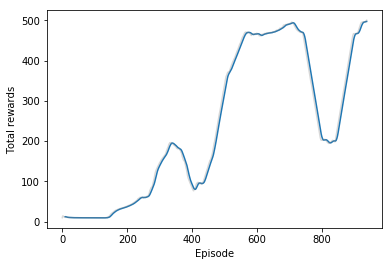

In [23]:
eps, arr = np.array(episode_rewards_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total rewards')

Text(0, 0.5, 'Total rewards')

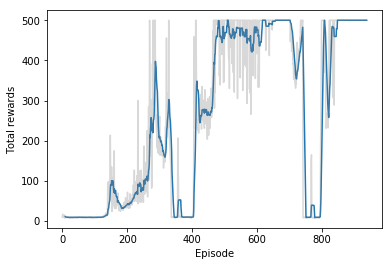

In [24]:
eps, arr = np.array(rewards_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total rewards')

Text(0, 0.5, 'Average losses')

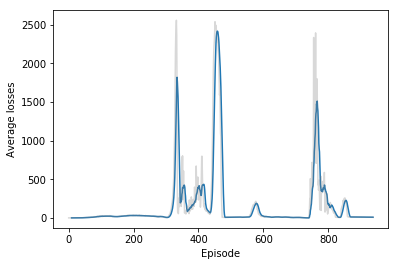

In [25]:
eps, arr = np.array(loss_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Average losses')

## Testing

Let's checkout how our trained agent plays the game.

In [24]:
# Creating a gym env
import gym
env = gym.make('CartPole-v0')
env = gym.make('CartPole-v1')

# A training graph session
with tf.Session(graph=graph) as sess:
    #sess.run(tf.global_variables_initializer())
    #saver.restore(sess, 'checkpoints/model.ckpt')    
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    # Episodes/epochs
    for _ in range(10):
        state = env.reset()
        total_reward = 0

        # Steps/batches
        while True:
            env.render()
            action_logits = sess.run(model.actions_logits, feed_dict={model.states: np.reshape(state, [1, -1])})
            action = np.argmax(action_logits)
            state, reward, done, _ = env.step(action)
            total_reward += reward
            if done:
                break
                
        # Closing the env
        print('total_reward: {}'.format(total_reward))
# Close the env at the end
env.close()

INFO:tensorflow:Restoring parameters from checkpoints/model.ckpt
total_reward: 500.0
total_reward: 500.0
total_reward: 500.0
total_reward: 500.0
total_reward: 500.0
total_reward: 500.0
total_reward: 500.0
total_reward: 500.0
total_reward: 500.0
total_reward: 500.0


## Extending this

So, Cart-Pole is a pretty simple game. However, the same model can be used to train an agent to play something much more complicated like Pong or Space Invaders. Instead of a state like we're using here though, you'd want to use convolutional layers to get the state from the screen images.

![Deep Q-Learning Atari](assets/atari-network.png)

I'll leave it as a challenge for you to use deep Q-learning to train an agent to play Atari games. Here's the original paper which will get you started: http://www.davidqiu.com:8888/research/nature14236.pdf.